In [1]:
# custom functions
from load_data import load_data
from col_list import col_list
from clean_data import clean_data
from hospitals_subplots import hospitals_subplots
from hospitals_plot import hospitals_plot

# modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

dir = '~/DSI/covid-symptom-searches/data/'
nrows= None
usecols = col_list()

hospital, searches, index = load_data(dir,nrows,usecols)
df = clean_data(searches,hospital)

In [2]:
print(hospital.shape)
key = hospital.groupby(['key'])['key'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
key = key[(key['Count'] > 400) & (key['Count'] < 500)]
print(key[key['key'] == 'CN'])
print(key.head(52))
key.describe()

(643715, 11)
Empty DataFrame
Columns: [key, Count]
Index: []
         key  Count
13        BR    470
5542   CH_ZG    467
5543   CH_ZH    467
5539   CH_UR    467
5538   CH_TI    467
5535   CH_SO    467
5537   CH_TG    467
5536   CH_SZ    467
5540   CH_VD    467
5531   CH_NW    467
5534   CH_SH    467
5533   CH_SG    467
5532   CH_OW    467
5530   CH_NE    467
5517      CH    467
5518   CH_AG    467
5519   CH_AI    467
5529   CH_LU    467
5520   CH_AR    467
5541   CH_VS    467
5715   IT_82    467
5522   CH_BL    467
5713   IT_77    467
5712   IT_75    467
5526   CH_GL    467
5711   IT_72    467
5702   IT_36    467
5703   IT_42    467
5704   IT_45    467
5716   IT_88    467
5705   IT_52    467
5525   CH_GE    467
5710   IT_67    467
5706   IT_55    467
5709   IT_65    467
5708   IT_62    467
5714   IT_78    467
5707   IT_57    467
5698   IT_21    467
5717   IT_BZ    467
5718   IT_TN    467
5700   IT_25    467
5527   CH_GR    467
5524   CH_FR    467
5528   CH_JU    467
5699   IT_23    467

,Count
count,634.000000
mean,447.176656
std,10.626817
min,401.000000
25%,444.000000
50%,449.000000
75%,449.000000
max,470.000000


In [3]:
hospital_cols_kd = list(hospital.columns) # Columns for hospital data, including key/date
hospital_cols = hospital_cols_kd[2:] # Columns for hospital data, excluding key/date
searches_cols_kd = list(searches.columns)
searches_cols = searches_cols_kd[2:]
# print(hospital_cols)
# print(searches_cols)

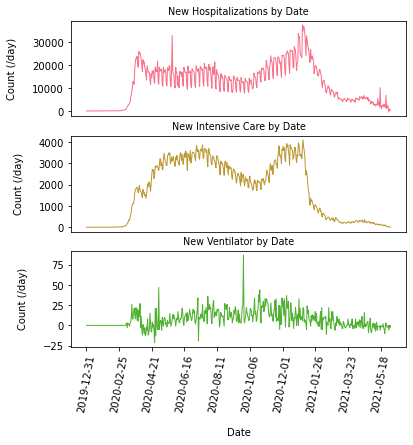

In [4]:
hospital_by_date = df[['date'] + hospital_cols].groupby('date').sum()

fig, axs = plt.subplots(3,1, figsize = (6,6))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})
matplotlib.rcParams.update({'font.size': 40})
matplotlib.rcParams.update({'lines.linewidth': 1})

palette = itertools.cycle(sns.color_palette("husl"))

ys = ["new_hospitalized",'new_intensive_care','new_ventilator']
ylabels = ['New Hospitalizations','New Intensive Care', 'New Ventilator']

save = False

color_codes = [next(palette) for _ in range(3)]

hospital_by_date.rename(columns=dict(zip(ys, ylabels)), inplace=True)

hospitals_subplots(hospital_by_date,ys,ylabels,color_codes,palette,axs)

# fig.tight_layout()
plt.show()

if save:
    fig.savefig('../img/hospitals_time_all.png', bbox_inches="tight")

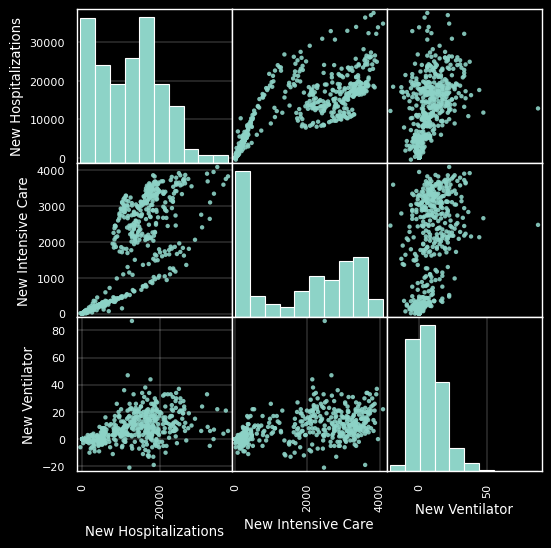

In [5]:
pd.plotting.scatter_matrix(hospital_by_date.loc[:,ylabels],
s=40,figsize=(6,6),alpha=0.9);

# plt.savefig('../img/hospitals_scatter_matrix.png');

(2046532, 40)
GB
(438, 11)
(438, 9)
BR
(470, 11)
(470, 9)


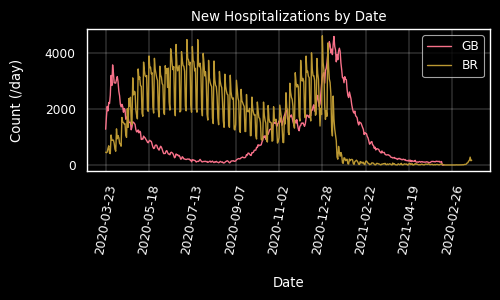

In [12]:
# country_keys = ['US', 'CN', 'GB','BR', 'KR', 'IN']
country_keys = ['GB','BR']

fig, ax = plt.subplots(figsize = (6,4))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})
matplotlib.rcParams.update({'font.size': 40})
matplotlib.rcParams.update({'lines.linewidth': 1})

palette = itertools.cycle(sns.color_palette("husl"))

ys = ["new_hospitalized"]
ylabels = ['New Hospitalizations']

save = True

print(df.shape)

for k in country_keys:
    color_codes = [next(palette)]*3
    print(k)
    df_country = hospital[hospital['key'] == k]
    print(df_country.shape)

    hospital_by_date = df_country[['date'] + hospital_cols].groupby('date').sum()
    print(hospital_by_date.shape)
    hospital_by_date.rename(columns=dict(zip(ys, ylabels)), inplace=True)

    hospitals_plot(hospital_by_date,ys,ylabels,color_codes,palette,ax)

ax.legend(country_keys)

fig.tight_layout()
plt.show()

if save:
    fig.savefig('../img/hospitals_time_countries.png', bbox_inches="tight")

In [7]:
# df = df[df['key'] == 'US']
searches_by_date = searches_US[['date'] + searches_cols].groupby('date').sum()

ylabels = list(searches_by_date.columns[1:])

titles = [label.replace('search_trends','').replace('_',' ') for label in ylabels]

fig = plt.figure(figsize=(12,20))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})

palette = itertools.cycle(sns.color_palette("husl"))

for i in range(27):
    ax = plt.subplot(9,3,i+1)
    g = sns.lineplot(x = "date", y = ylabels[i],
                data = searches_by_date,
                color=next(palette))
    plt.xticks(rotation=90)

    xtick_range = range(0,len(searches_by_date.index),14)
    ax.set_xlim()
    ax.set_title(titles[i])
    if i > 23:
        ax.set_xticks(xtick_range) # <--- set the ticks first
        ax.set_xlabel('date', labelpad=15)
    else:
        ax.set_xticks([])
        ax.set_xlabel('')

    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Search Density ', labelpad=15)

fig.tight_layout()
plt.show()

fig.savefig('../img/searchs_time.png')

NameError: name 'searches_US' is not defined

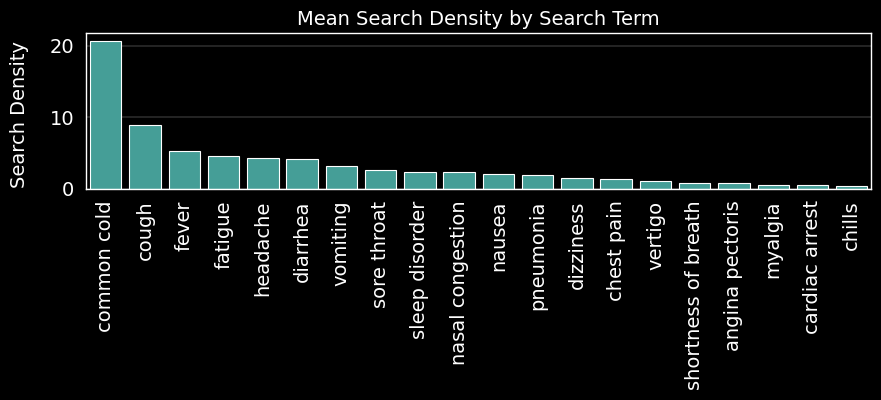

In [18]:
search_means = searches_US[searches_cols].mean().sort_values(ascending = False).iloc[:20]
search_strs = [label.replace('search_trends_','').replace('_',' ') for label in list(search_means.index)]

fsize = 14
plt.rcParams["axes.labelsize"] = fsize
plt.rcParams["xtick.labelsize"] = fsize
plt.rcParams["ytick.labelsize"] = fsize
plt.rcParams["axes.titlesize"] = fsize

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

sns.barplot(search_means.index, search_means.values, color=next(palette))
ax.set_xticklabels(search_strs,rotation=90);
ax.set_ylabel('Search Density ', labelpad=15);
ax.set_title('Mean Search Density by Search Term');

plt.tight_layout()
fig.savefig('../img/mean_search_density.png')

In [19]:
# pd.plotting.autocorrelation_plot(brtypes);